In [1]:
import scvelo as scv
import os
import numpy as np

os.chdir("../")

In [2]:
adata = scv.read("velocity_IL22+.h5ad")

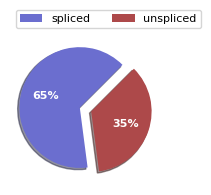

In [3]:
scv.pl.proportions(adata)

In [4]:
np.unique(adata.obs['Final.IDS'])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [5]:
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)

Filtered out 7554 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Exctracted 2000 highly variable genes.
Logarithmized X.


In [6]:
scv.pp.moments(adata, n_pcs=25, n_neighbors=30, use_rep="X_pca")

computing neighbors
    finished (0:00:05) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [7]:
scv.tl.recover_dynamics(adata)

recovering dynamics
... 37%

KeyboardInterrupt: 

In [ ]:
#scv.tl.velocity(adata,mode='stochastic')

In [13]:
scv.tl.velocity_graph(adata)

computing velocities
    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:03) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


saving figure to file ./figures/scvelo_IL22+_velocity.pdf


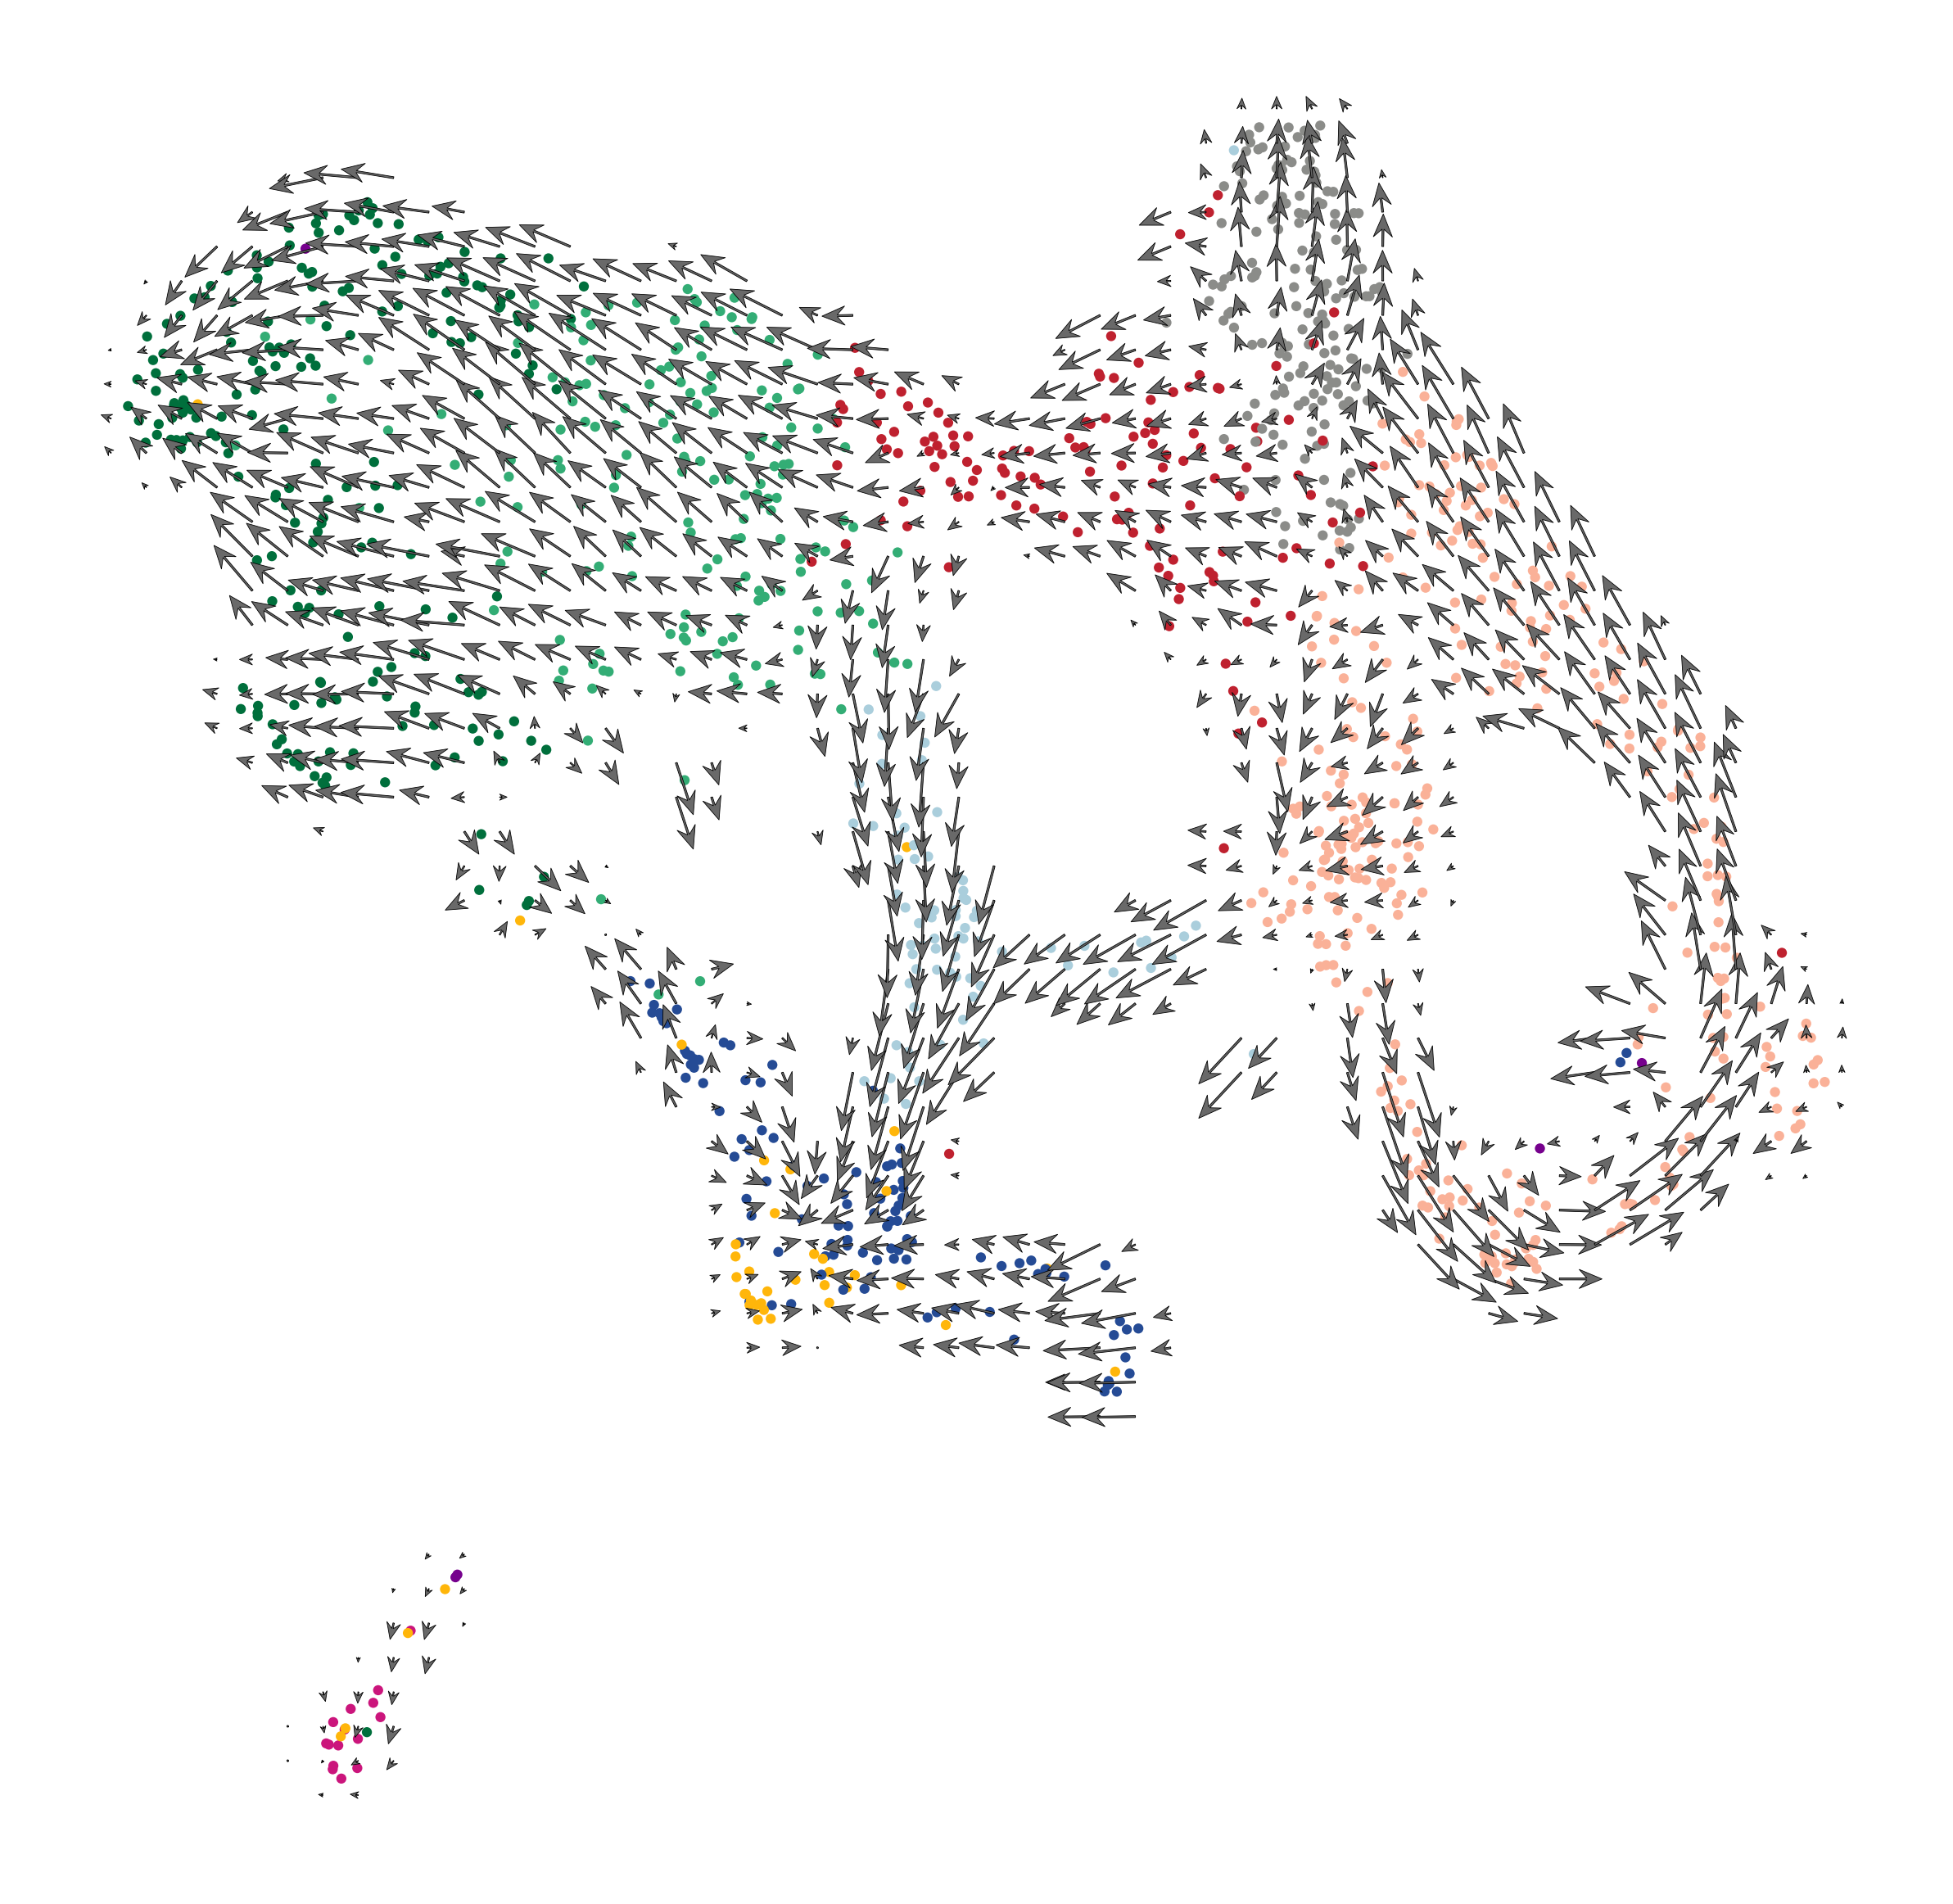

In [19]:
scv.pl.velocity_embedding_grid(adata, basis="umap",color="Final.IDS",arrow_size=2,
                               arrow_length=5,dpi=300,figsize=(10,10),alpha=1, arrow_color="dimgrey",
                              palette=["#FFB60A","#76018D","#33AD75","#006F3C","#BF212F",
                                       "#8b8c89","#254B95","#FAB198","#AACEDC","#CB157C"],
                               size=35,title="",save="IL22+_velocity.pdf")




In [ ]:
scv.tl.velocity(adata, mode='dynamical')
scv.tl.velocity_graph(adata)

In [ ]:
scv.pl.velocity_embedding_stream(adata, basis='umap',color="Final.IDS")

In [ ]:
top_genes = adata.var['fit_likelihood'].sort_values(ascending=False).index
scv.pl.scatter(adata, basis=top_genes[:15], ncols=5, frameon=False, )

In [ ]:
scv.tl.velocity_confidence(adata)
keys = 'velocity_length', 'velocity_confidence'
scv.pl.scatter(adata, c=keys, cmap='coolwarm', perc=[5, 95])

In [ ]:
scv.tl.latent_time(adata,root_key='2')
scv.pl.scatter(adata, color='latent_time', color_map='gnuplot', size=80)


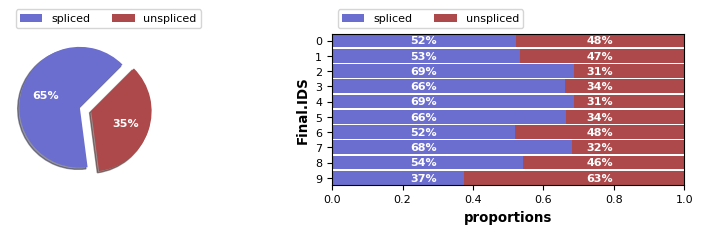

In [17]:
scv.pl.proportions(adata,groupby='Final.IDS')


In [ ]:
scv.pl.velocity(adata, ['LGR5'], ncols=2)

In [ ]:
adata.write_h5ad('paneth_dynamic.h5ad')

In [8]:
!conda list

# packages in environment at /Users/jeffdemartino/opt/miniconda3:
#
# Name                    Version                   Build  Channel
aniso8601                 8.0.0                    pypi_0    pypi
anndata                   0.7.3                    pypi_0    pypi
annoy                     1.16.3                   pypi_0    pypi
appnope                   0.1.0           py37hc8dfbb8_1001    conda-forge
attrs                     19.3.0                     py_0    conda-forge
backcall                  0.2.0              pyh9f0ad1d_0    conda-forge
biopython                 1.72                     pypi_0    pypi
blas                      1.0                         mkl  
bleach                    3.1.5              pyh9f0ad1d_0    conda-forge
blosc                     1.19.0               hab81aa3_0  
boto3                     1.7.84                   pypi_0    pypi
botocore                  1.10.84                  pypi_0    pypi
bowtie                    1.2.3            py37h770b8ee

In [9]:
import IPython; print(IPython.sys_info())

{'commit_hash': '2486838d9',
 'commit_source': 'installation',
 'default_encoding': 'UTF-8',
 'ipython_path': '/Users/jeffdemartino/opt/miniconda3/lib/python3.7/site-packages/IPython',
 'ipython_version': '7.16.1',
 'os_name': 'posix',
 'platform': 'Darwin-20.3.0-x86_64-i386-64bit',
 'sys_executable': '/Users/jeffdemartino/opt/miniconda3/bin/python',
 'sys_platform': 'darwin',
 'sys_version': '3.7.7 (default, Mar 26 2020, 10:32:53) \n'
                '[Clang 4.0.1 (tags/RELEASE_401/final)]'}
